In [23]:

# Import necessary libraries
!pip install spacy
!python -m spacy download el_core_news_sm
from spacy.lang.el.stop_words import STOP_WORDS
import pandas as pd
import matplotlib.pyplot as plt
import spacy
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 66.9 MB/s eta 0:00:0000:010:01
✔ Download and installation successful
You can now load the package via spacy.load('el_core_news_sm')


In [ ]:

df = pd.read_csv('tell_all.csv')

print(df.head())


In [25]:
# Get the column names
variable_names = df.columns

# Print the variable names
print(variable_names)

# Number of speeches
num_speeches = len(df)
print(f"Number of speeches: {num_speeches}")

# Group by political party and count the number of speeches
party_counts = df['political_party'].value_counts()

# Print the result
print(party_counts)

Index(['member_name', 'sitting_date', 'parliamentary_period',
       'parliamentary_session', 'parliamentary_sitting', 'political_party',
       'government', 'member_region', 'roles', 'member_gender', 'speaker_info',
       'speech'],
      dtype='object')
Number of speeches: 1280918
νεα δημοκρατια                                                                     410593
πανελληνιο σοσιαλιστικο κινημα                                                     380270
συνασπισμος ριζοσπαστικης αριστερας                                                144380
κομμουνιστικο κομμα ελλαδας                                                         89084
βουλη                                                                               46595
συνασπισμος της αριστερας των κινηματων και της οικολογιας                          33090
δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)     27023
λαικος ορθοδοξος συναγερμος                                                         

In [3]:
# Drop rows with NaN in 'member_gender'
df_cleaned = df.dropna(subset=['member_gender'])

# Calculate the total number of speakers
total_speakers = len(df_cleaned)

# Calculate the number of male and female speakers
male_speakers = len(df_cleaned[df_cleaned['member_gender'] == 'male'])
female_speakers = len(df_cleaned[df_cleaned['member_gender'] == 'female'])

# Calculate the percentages
male_percentage = (male_speakers / total_speakers) * 100
female_percentage = (female_speakers / total_speakers) * 100

# Print the percentages
print(f"Percentage of Male Speakers: {male_percentage:.2f}%")
print(f"Percentage of Female Speakers: {female_percentage:.2f}%")

Percentage of Male Speakers: 89.06%
Percentage of Female Speakers: 10.94%


In [ ]:
# Filter out rows where speech is not NaN
valid_speeches = df['speech'].dropna()

# Calculate the average speech length in words, excluding special characters
def count_words_without_special_chars(text):
    # Remove special characters and then split into words
    words = [word for word in text.split() if not word.startswith('@')]
    return len(words)

average_speech_length = valid_speeches.apply(count_words_without_special_chars).mean()

# Print the average speech length
print(f"The average speech length is: {average_speech_length:.2f} words")


In [ ]:

# Load your dataset
df = pd.read_csv('tell_all.csv') 

# Load the Greek spaCy model
nlp = spacy.load('el_core_news_sm')

# Step 1: Remove rows with NaN values in the 'speech' column
df_cleaned = df.dropna(subset=['speech'])

# Step 2: Lowercase the 'speech' column
df_cleaned['speech'] = df_cleaned['speech'].str.lower()

# Step 3: Remove stop words using spaCy
df_cleaned['speech'] = df_cleaned['speech'].apply(lambda text: ' '.join([token.text for token in nlp(text) if token.text not in STOP_WORDS]))

# Step 4: Lemmatization using spaCy
#df_cleaned['speech'] = df_cleaned['speech'].apply(lambda text: ' '.join([token.lemma_ for token in nlp(text)]))



# Display the cleaned dataset
print(df_cleaned.head())


In [3]:

df = pd.read_csv('uncleaned_mul.csv')


import unicodedata

# Function to remove accents from Greek text using normalize and translate
def remove_accents(text):
    normalized_text = unicodedata.normalize('NFD', text)
    removed_accents_text = ''.join(char for char in normalized_text if unicodedata.category(char) != 'Mn')
    return removed_accents_text

# Apply the function to the 'speech' column
df['speech'] = df['speech'].apply(remove_accents)

print(df.head())

TypeError: normalize() argument 2 must be str, not float

In [7]:
# Remove numbers from the speech column
df['speech'] = df['speech'].str.replace(r'\d+', '', regex=True)

# Display the updated Dataset
print(df.head())

                    member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
1  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
2  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
3                           NaN   03/07/1989             period 5   
4  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
2             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
3             session 1             sitting 1                           βουλη   
4             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989

In [21]:

# Remove specific punctuation marks
df['speech'] = df['speech'].str.replace(r'[;:,!`".]', '', regex=True)

print(df.head())

                    member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
1  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
2  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
3                           NaN   03/07/1989             period 5   
4  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
2             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
3             session 1             sitting 1                           βουλη   
4             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989

In [13]:
# Remove Greek letter 'κ' when it is alone
df['speech'] = df['speech'].str.replace(r'\bκ\b', '', regex=True)

print(df.head())

                    member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
1  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
2  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
3                           NaN   03/07/1989             period 5   
4  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
2             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
3             session 1             sitting 1                           βουλη   
4             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989

In [22]:
# Function to remove specific words from text(not used)
def remove_specific_words(text, words_to_remove):
    for word in words_to_remove:
        text = text.replace(word, '')
    return text

# List of words to remove
words_to_remove = ['κυριος', 'κυρια' , 'κυριε' , 'κυριας', 'κυριου', 'κυριο', 'κυριοι' , 'κυριες', 'κυριων', 'κυριους']

# Apply the function to the 'speech' column
df['speech'] = df['speech'].apply(lambda text: remove_specific_words(text, words_to_remove))

print(df.head())

                    member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
1  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
2  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
3                           NaN   03/07/1989             period 5   
4  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
2             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
3             session 1             sitting 1                           βουλη   
4             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989

In [23]:
import re

# remove all non greek characters with regular expression
df['speech'] = df['speech'].apply(lambda text: re.sub(r'[^α-ωΑ-Ωίϊΐόάέύϋΰήώ\s]', '', text))

# Display the DataFrame
print(df.head())


                    member_name sitting_date parliamentary_period  \
0  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
1  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
2  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   
3                           NaN   03/07/1989             period 5   
4  κρητικος νικολαου παναγιωτης   03/07/1989             period 5   

  parliamentary_session parliamentary_sitting                 political_party  \
0             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
1             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
2             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   
3             session 1             sitting 1                           βουλη   
4             session 1             sitting 1  πανελληνιο σοσιαλιστικο κινημα   

                                     government member_region  \
0  ['τζαννετακη τζαννη(02/07/1989

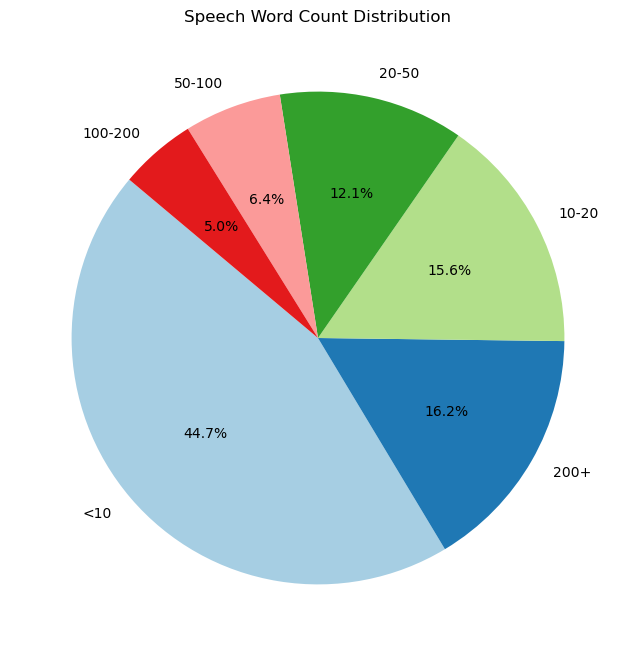

In [1]:

df = pd.read_csv('tell_all.csv')
# Calculate the length of each speech in terms of word count
df['word_count'] = df['speech'].apply(lambda x: len(str(x).split()))

# Define word count categories
bins = [0, 10, 20, 50, 100, 200, float('inf')]
labels = ['<10', '10-20', '20-50', '50-100', '100-200', '200+']

# Categorize speeches based on word count
df['word_count_category'] = pd.cut(df['word_count'], bins=bins, labels=labels, right=False)

# Get the count of speeches in each category
category_counts = df['word_count_category'].value_counts()

# Plot a pie chart to visualize the distribution
plt.figure(figsize=(8, 8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Speech Word Count Distribution')
plt.show()


In [6]:
# Longest speech search
df = pd.read_csv('labelled_less_10.csv')
word_counts = df['speech'].apply(lambda x: len(x.split()))

# Find the length of the longest speech
max_length = word_counts.max()

print(f"The length of the longest speech is: {max_length} words.")


The length of the longest speech is: 23291 words.


In [16]:

# Load data from a CSV file
df = pd.read_csv('labelled_20-500.csv')

# Print unique values in the 'renamed_party' column
unique_parties = df['renamed_party'].unique()
print("Unique party names:", unique_parties)


Unique party names: ['πασοκ συνολικο' 'νεα δημοκρατια'
 'συνασπισμος ριζοσπαστικης αριστερας(συνολικο)'
 'κομμουνιστικο κομμα ελλαδας']


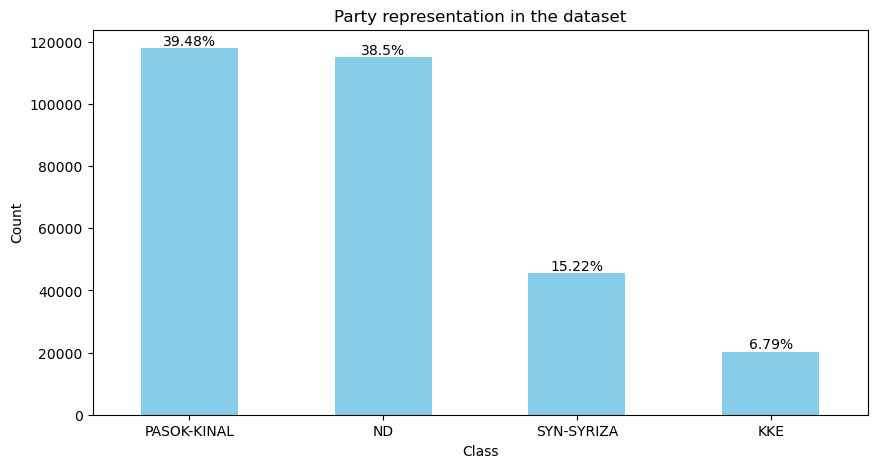

In [20]:

# Load data from a CSV file
df = pd.read_csv('labelled_20-500.csv')

# Define the mapping of original party names to translated
class_mapping = {
    'πασοκ συνολικο': 'PASOK-KINAL',
    'νεα δημοκρατια': 'ND',
    'συνασπισμος ριζοσπαστικης αριστερας(συνολικο)': 'SYN-SYRIZA',
    'κομμουνιστικο κομμα ελλαδας': 'KKE'
}

# Apply mapping
df['class_label'] = df['renamed_party'].map(class_mapping)

# Calculate the count of each class
class_counts = df['class_label'].value_counts()

# Calculate total for percentage calculation
total = class_counts.sum()

# Calculate percentages
percentages = (class_counts / total * 100).round(2)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
class_counts.plot(kind='bar', color='skyblue', ax=ax)

# Annotate bars with percentage values
for i, (pct, count) in enumerate(zip(percentages, class_counts)):
    ax.text(i, count + 5, f'{pct}%', ha='center', va='bottom') 

plt.title('Party representation in the dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()



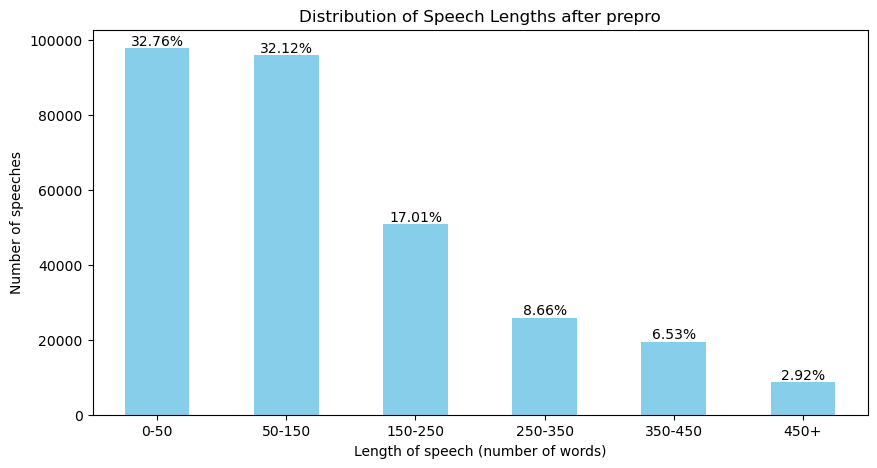

In [25]:

df = pd.read_csv('labelled_20-500.csv')  

# Define the categories
bins = [0, 50, 150, 250, 350, 450, float('inf')]
labels = ['0-50', '50-150', '150-250', '250-350', '350-450', '450+']

# Categorize the data
df['category'] = pd.cut(df['speech_length'], bins=bins, labels=labels, right=False)

# Calculate the count of speeches in each category
category_counts = df['category'].value_counts(sort=False)

# Calculate total speeches for percentage calculation
total_speeches = df['category'].count()

# Reorder the index to match the defined categories for consistency in plotting
category_counts = category_counts.reindex(labels)

# Calculate percentages
percentages = (category_counts / total_speeches * 100).round(2)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
category_counts.plot(kind='bar', color='skyblue', ax=ax)

# Annotate bars with percentage values
for i, (pct, count) in enumerate(zip(percentages, category_counts)):
    ax.text(i, count + 5, f'{pct}%', ha='center', va='bottom')

plt.title('Distribution of Speech Lengths after prepro')
plt.xlabel('Length of speech (number of words)')
plt.ylabel('Number of speeches')
plt.xticks(rotation=0)
plt.show()

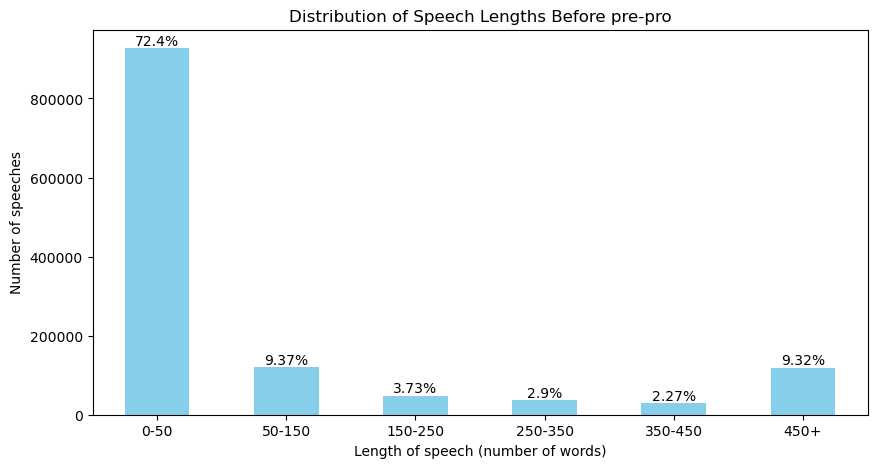

In [24]:
df = pd.read_csv('tell_all.csv')


# Create 'speech_length' by counting words in 'speech_text'
df['speech_length'] = df['speech'].str.split().str.len()
# Define the categories
bins = [0, 50, 150, 250, 350, 450, float('inf')]
labels = ['0-50', '50-150', '150-250', '250-350', '350-450', '450+']

# Categorize the data
df['category'] = pd.cut(df['speech_length'], bins=bins, labels=labels, right=False)

# Calculate the count of speeches in each category
category_counts = df['category'].value_counts(sort=False)

# Calculate total speeches for percentage calculation
total_speeches = df['category'].count()

# Reorder the index to match the defined categories for consistency in plotting
category_counts = category_counts.reindex(labels)

# Calculate percentages
percentages = (category_counts / total_speeches * 100).round(2)

# Create a bar chart
fig, ax = plt.subplots(figsize=(10, 5))
category_counts.plot(kind='bar', color='skyblue', ax=ax)

# Annotate bars with percentage values
for i, (pct, count) in enumerate(zip(percentages, category_counts)):
    ax.text(i, count + 5, f'{pct}%', ha='center', va='bottom')

plt.title('Distribution of Speech Lengths Before pre-pro')
plt.xlabel('Length of speech (number of words)')
plt.ylabel('Number of speeches')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# Code to split validation set into 3 decades

df = pd.read_csv('cleaned_labelled.csv')

# splitting the dataset in periods
df['sitting_date'] = pd.to_datetime(df['sitting_date'])

# Define the date ranges
start_date_1 = pd.to_datetime('1989-07-03')
end_date_1 = pd.to_datetime('2000-04-13')

start_date_2 = pd.to_datetime('2000-04-13')
end_date_2 = pd.to_datetime('2009-10-07')

start_date_3 = pd.to_datetime('2009-10-07')
end_date_3 = df['sitting_date'].max()

# Split the DataFrame into three parts
df_part1 = df[(df['sitting_date'] >= start_date_1) & (df['sitting_date'] < end_date_1)]
df_part2 = df[(df['sitting_date'] >= start_date_2) & (df['sitting_date'] < end_date_2)]
df_part3 = df[(df['sitting_date'] >= start_date_3) & (df['sitting_date'] <= end_date_3)]

# Save each part to a CSV file
df_part1.to_csv('part1.csv', index=False)
df_part2.to_csv('part2.csv', index=False)
df_part3.to_csv('part3.csv', index=False)  

# Check the lengths of the three parts
print("Part 1 Length:", len(df_part1))
print("Part 2 Length:", len(df_part2))
print("Part 3 Length:", len(df_part3))


In [ ]:
# Define the parties to keep
parties_to_keep = [
    "νεα δημοκρατια",
    "κομμουνιστικο κομμα ελλαδας",
    "συνασπισμος ριζοσπαστικης αριστερας",
    "συνασπισμος της αριστερας των κινηματων και της οικολογιας",
    "δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)",
    "κινημα αλλαγης",
    "πανελληνιο σοσιαλιστικο κινημα"
]

# Filter the dataframe
df_filtered = df[df['political_party'].isin(parties_to_keep)]

# Rename parties and create a new column for the renamed parties
rename_map = {
    "συνασπισμος ριζοσπαστικης αριστερας": "συνασπισμος ριζοσπαστικης αριστερας(συνολικο)",
    "συνασπισμος της αριστερας των κινηματων και της οικολογιας": "συνασπισμος ριζοσπαστικης αριστερας(συνολικο)",
    "δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)": "πασοκ συνολικο",
    "κινημα αλλαγης": "πασοκ συνολικο",
    "πανελληνιο σοσιαλιστικο κινημα": "πασοκ συνολικο"
}

# Apply the rename map to create a new column with renamed parties
df_filtered['renamed_party'] = df_filtered['political_party'].map(rename_map).fillna(df_filtered['political_party'])

#save the filtered and updated dataframe to a new CSV file
df_filtered.to_csv("uncleaned_mul.csv", index=False)


In [ ]:
#second ideology split in 4 categories(not used)

df = pd.read_csv('tell_all_cleaned.csv')

# Mapping of political parties to ideologies
ideology_mapping_2 = {
    'νεα δημοκρατια': 'centre-right',
    'πανελληνιο σοσιαλιστικο κινημα': 'centre-left',
    'συνασπισμος ριζοσπαστικης αριστερας': 'left',
    'κομμουνιστικο κομμα ελλαδας': 'left',
    'συνασπισμος της αριστερας των κινηματων και της οικολογιας': 'left',
    'δημοκρατικη συμπαραταξη (πανελληνιο σοσιαλιστικο κινημα - δημοκρατικη αριστερα)': 'centre-left',
    'λαικος ορθοδοξος συναγερμος': 'right',
    'ανεξαρτητοι ελληνες - πανος καμμενος': 'right',
    'το ποταμι': 'centre-left',
    'λαικος συνδεσμος - χρυση αυγη': 'right',
    'ενωση κεντρωων': 'centre-right',
    'ανεξαρτητοι ελληνες εθνικη πατριωτικη δημοκρατικη συμμαχια': 'right',
    'δημοκρατικο κοινωνικο κινημα': 'centre-left',
    'κινημα αλλαγης': 'centre-left',
    'ελληνικη λυση - κυριακος βελοπουλος': 'right',
    'δημοκρατικη αριστερα': 'centre-left',
    'πολιτικη ανοιξη': 'right',
    'μετωπο ευρωπαικης ρεαλιστικης ανυπακοης (μερα25)': 'left',
    'ανεξαρτητοι δημοκρατικοι βουλευτες': 'right',
    'οικολογοι εναλλακτικοι (ομοσπονδια οικολογικων εναλλακτικων οργανωσεων)': 'left',
    'δημοκρατικη ανανεωση': 'right',
    'λαικη ενοτητα': 'left',
}

# Create 'ideology' column based on the mapping
df['ideology_2'] = df['political_party'].map(ideology_mapping_2)

# Drop rows where 'ideology' is NaN
df = df.dropna(subset=['ideology_2'])

# Drop rows with less than 1 word at the speech column
#df= df[df['speech'].apply(lambda x: len(x.split()) > 0)]

#save
df.to_csv('tell_all_clean_labelled.csv', index=False)
# Display the DataFrame with the new 'ideology' column
print(df[['political_party', 'ideology_2']].tail(30))